In [159]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from IPython.display import display 

from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings("ignore")

plt.style.use('seaborn-poster')

# Seeding everything first
- This will allow us reproduce results

In [134]:
seed = 41
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

In [135]:
PATH_TO_DATA = "data/BankDataset.csv"

In [136]:
data = pd.read_csv(PATH_TO_DATA)
display(data.head(n = 10))

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36


# Exploratory Data Analysis
- Let's try to understand the data

In [137]:
print("Number of samples: {}, number of features {}".format(data.shape[0], data.shape[1]))

Number of samples: 10127, number of features 10


In [138]:
display(data.columns.tolist())

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book']

# Let's drop the "CLIENTNUM" feature
- This feature represents the Client Id and in our case it's useles
- But first let's be sure that each sample in dataset it's a unique individual

In [139]:
assert len(np.unique(data["CLIENTNUM"].values)) == data.shape[0], "Samples are not unique"

data.drop(["CLIENTNUM"], axis = 1, inplace = True)
display(data)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21
...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36


# Features in Dataset
- "Attrition_Flag" -> Internal event (customer activity) variable - if the account is closed then 1 else 0
- "Customer_Age" -> Demographic variable - Customer's Age in Years
- "Gender" -> Demographic variable - M = Male, F = Female
- "Dependent_count" -> Demographic variable - Number of dependents
- "Education_Level" -> Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
- "Marital_Status" -> Demographic variable - Married, Single, Divorced, Unknown
- "Income_Category" -> Demographic variable - Annual Income Category of the account holder (< 40K, 40K - 60K, 60K - 80K, 80K-120K, > 120K, Unknown)

# Let's pay attention to each individual feature

# "Attrition_Flag" -> Type of customer 
- Might be "Existing Customer" or "Attrited Customer"

In [140]:
values, counts = np.unique(data["Attrition_Flag"].values, return_counts = True)

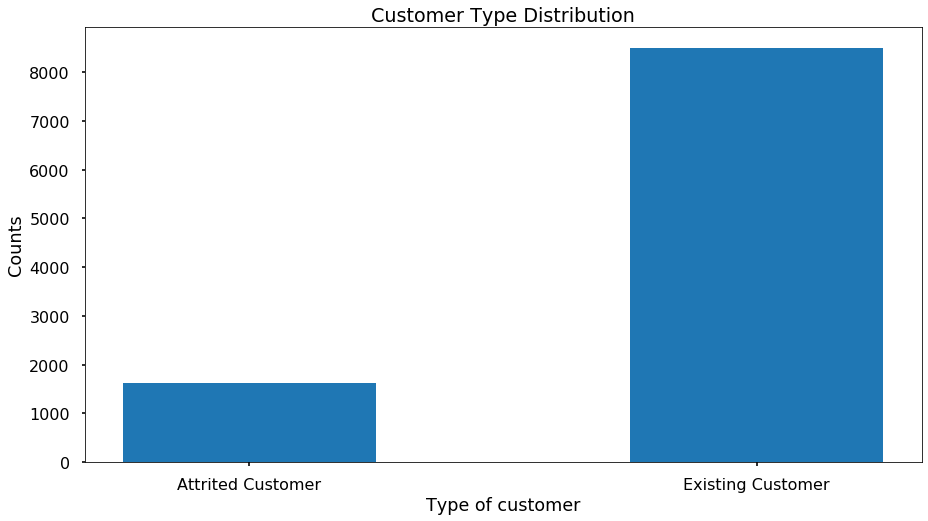

In [141]:
plt.figure(figsize = (15, 8))
plt.bar(range(len(values)), counts, width = 0.5 , align='center')
plt.xticks(range(len(values)), values)
plt.xlabel("Type of customer")
plt.ylabel('Counts')
plt.title("Customer Type Distribution")
plt.show()

# "Customer_Age"

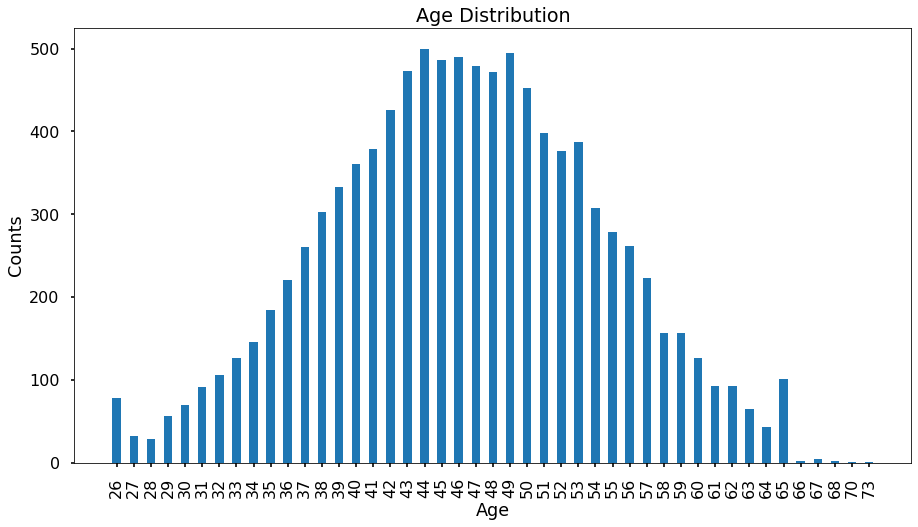

In [142]:
values, counts = np.unique(data["Customer_Age"].values, return_counts = True)

plt.figure(figsize = (15, 8))
plt.bar(range(len(values)), counts, width = 0.5 , align='center')
plt.xticks(range(len(values)), values, rotation = 90)
plt.xlabel("Age")
plt.ylabel('Counts')
plt.title("Age Distribution")
plt.show()

# Let's establish some age groups
- This will give us another perspective on the dataset

In [143]:
bins = [30, 40, 50, 60]
data["Age_Groups"] = np.digitize(data["Customer_Age"].values, bins = bins)

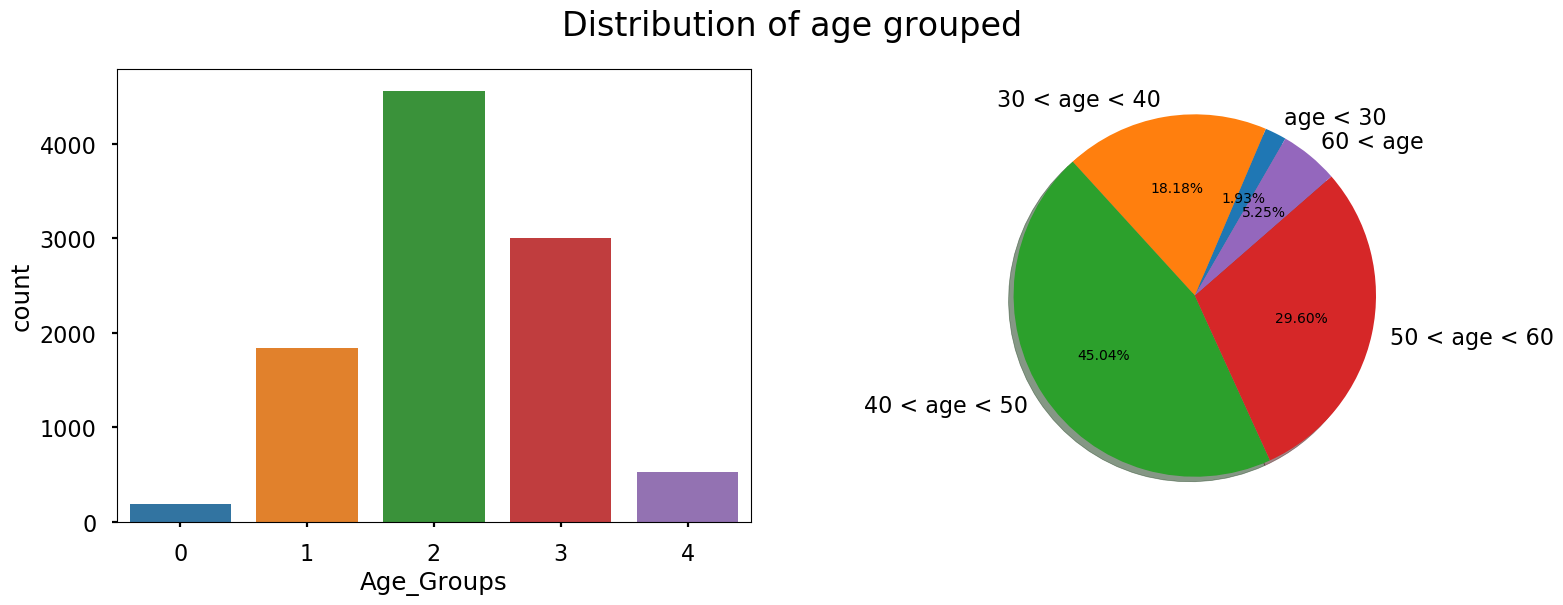

In [144]:
labels = ["age < 30", "30 < age < 40", "40 < age < 50", "50 < age < 60", "60 < age"]

fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = (18, 6), dpi = 100)
sns.countplot(data['Age_Groups'], ax = axes[0])

axes[1].pie(data['Age_Groups'].value_counts().sort_index(), labels = labels, autopct = '%1.2f%%', shadow = True, startangle=60)

fig.suptitle('Distribution of age grouped', fontsize = 24)
plt.show()

# "Gender"

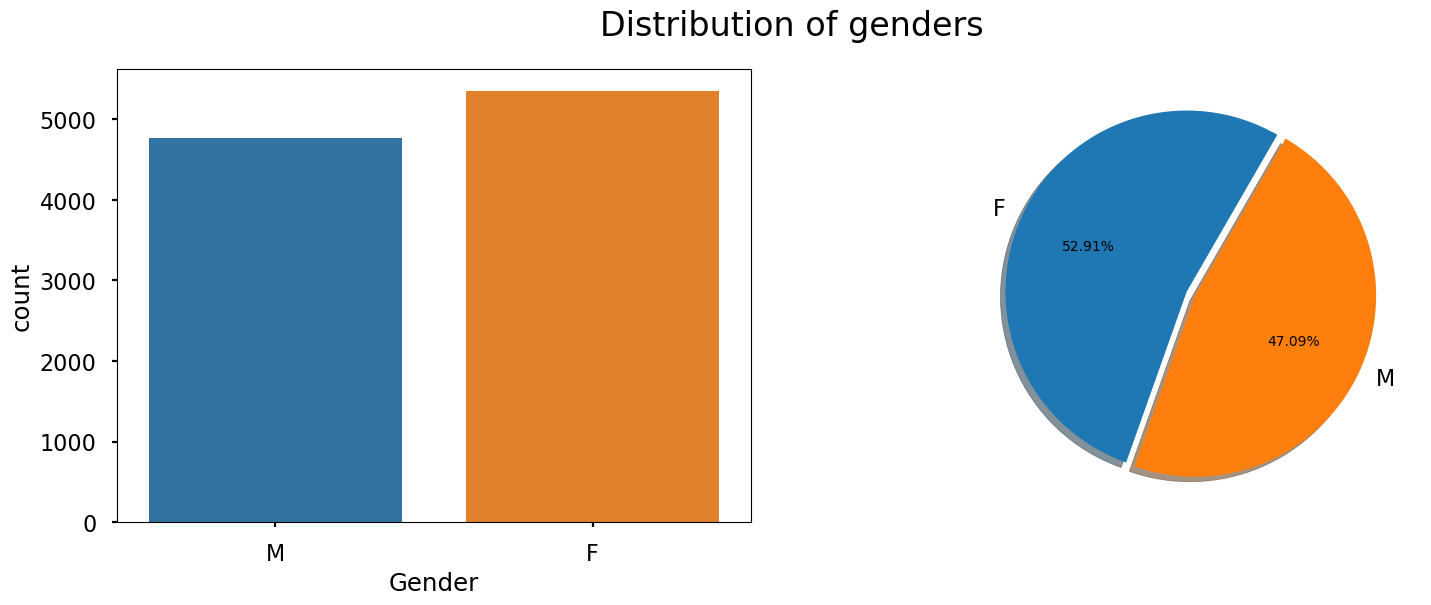

In [147]:
fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = (18, 6), dpi = 100)
sns.countplot(data['Gender'], ax = axes[0])
axes[1].pie(data['Gender'].value_counts(), labels = ['F', 'M'], autopct = '%1.2f%%', shadow = True, explode = (0.05, 0), startangle=60)

fig.suptitle('Distribution of genders', fontsize = 24)
plt.show()

# "Dependent_count" -> number of persons that relies on the client
- Examples: children, "old" parents....

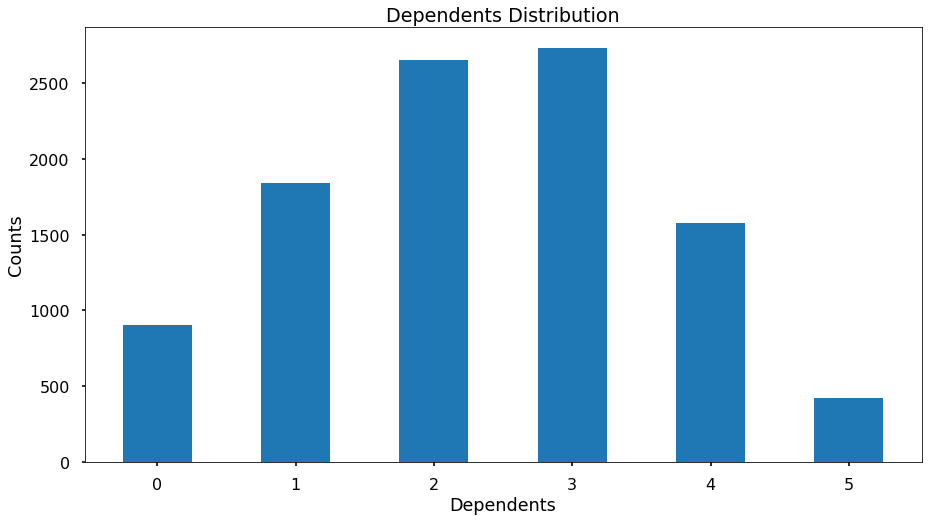

In [148]:
values, counts = np.unique(data["Dependent_count"].values, return_counts = True)

plt.figure(figsize = (15, 8))
plt.bar(range(len(values)), counts, width = 0.5 , align='center')
plt.xticks(range(len(values)), values)
plt.xlabel("Dependents")
plt.ylabel('Counts')
plt.title("Dependents Distribution")
plt.show()

# "Education_Level"

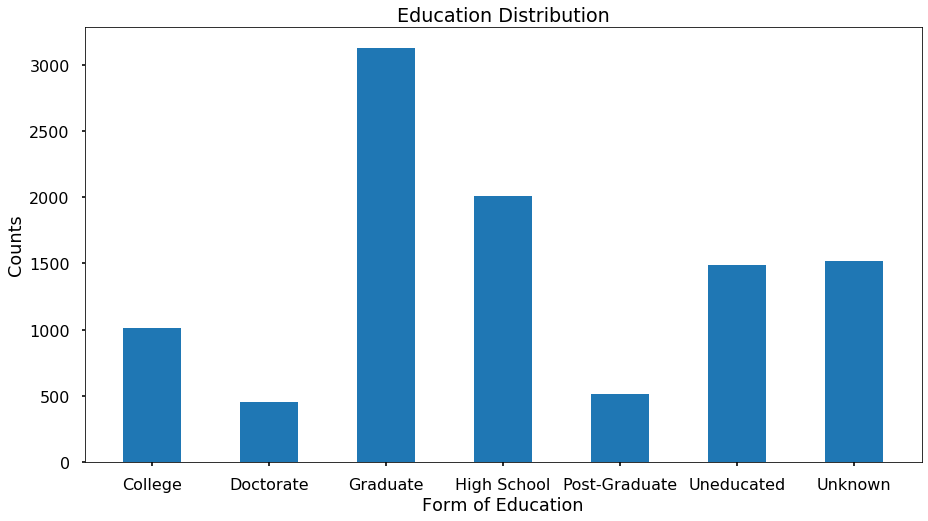

In [199]:
values, counts = np.unique(data["Education_Level"].values, return_counts = True)

plt.figure(figsize = (15, 8))
plt.bar(range(len(values)), counts, width = 0.5 , align='center')
plt.xticks(range(len(values)), values)
plt.xlabel("Form of Education")
plt.ylabel('Counts')
plt.title("Education Distribution")
plt.show()

# "Marital_Status"

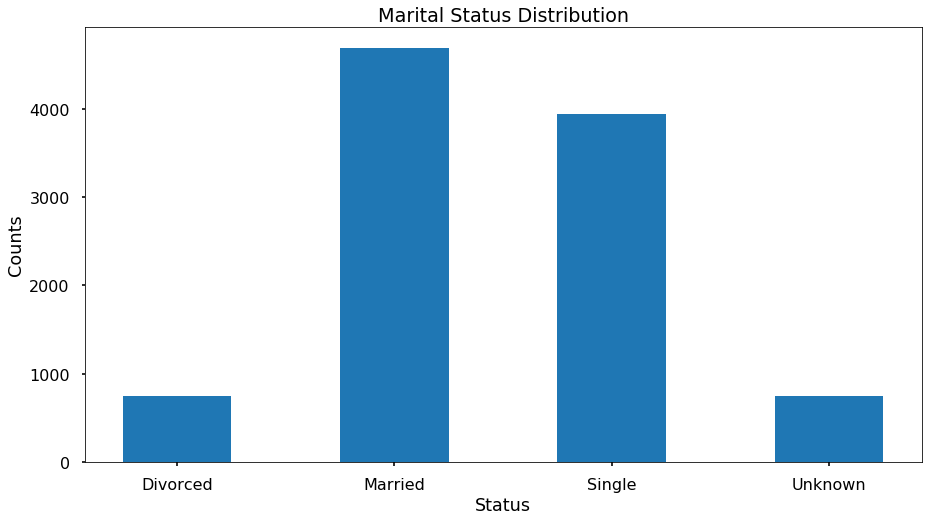

In [152]:
values, counts = np.unique(data["Marital_Status"].values, return_counts = True)

plt.figure(figsize = (15, 8))
plt.bar(range(len(values)), counts, width = 0.5 , align='center')
plt.xticks(range(len(values)), values)
plt.xlabel("Status")
plt.ylabel('Counts')
plt.title("Marital Status Distribution")
plt.show()

# "Income_Category"

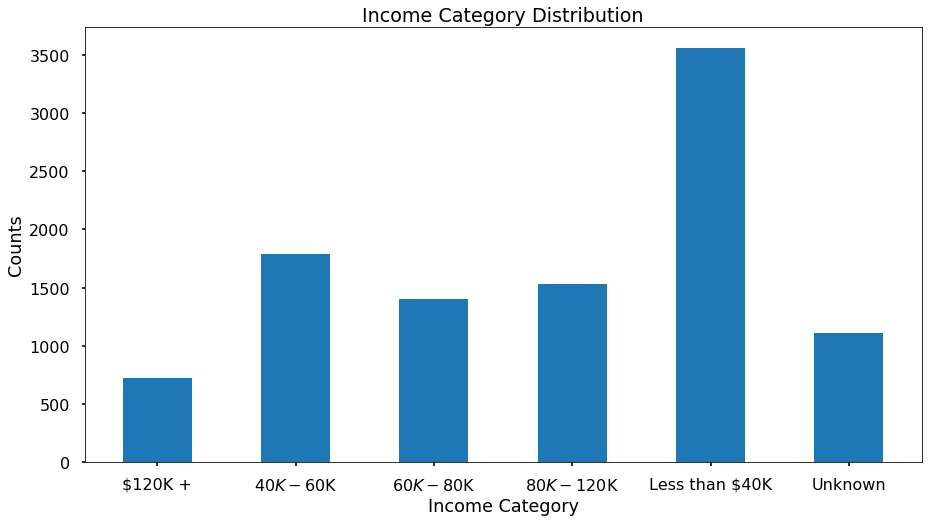

In [154]:
values, counts = np.unique(data["Income_Category"].values, return_counts = True)

plt.figure(figsize = (15, 8))
plt.bar(range(len(values)), counts, width = 0.5 , align='center')
plt.xticks(range(len(values)), values)
plt.xlabel("Income Category")
plt.ylabel('Counts')
plt.title("Income Category Distribution")
plt.show()

# "Card_Category"

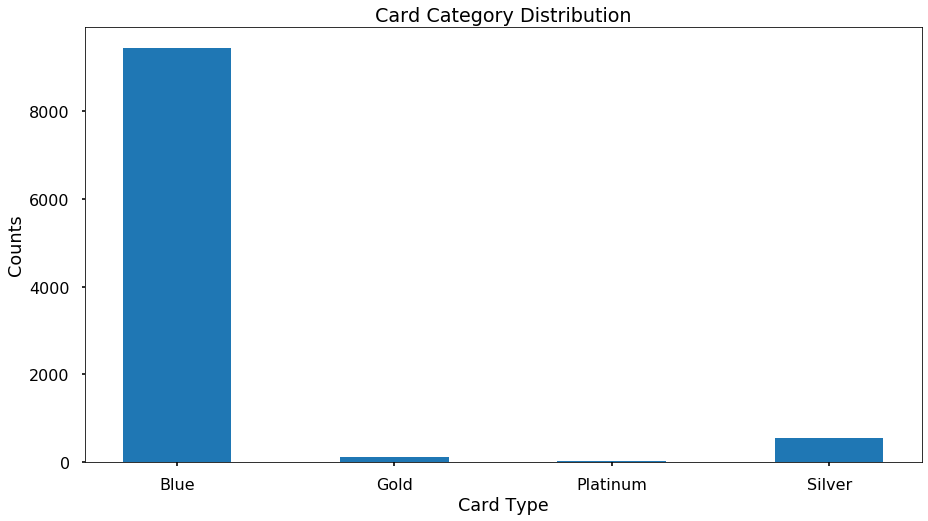

In [156]:
values, counts = np.unique(data["Card_Category"].values, return_counts = True)

plt.figure(figsize = (15, 8))
plt.bar(range(len(values)), counts, width = 0.5 , align='center')
plt.xticks(range(len(values)), values)
plt.xlabel("Card Type")
plt.ylabel('Counts')
plt.title("Card Category Distribution")
plt.show()

# "Months_on_book" - Period of relationship with bank

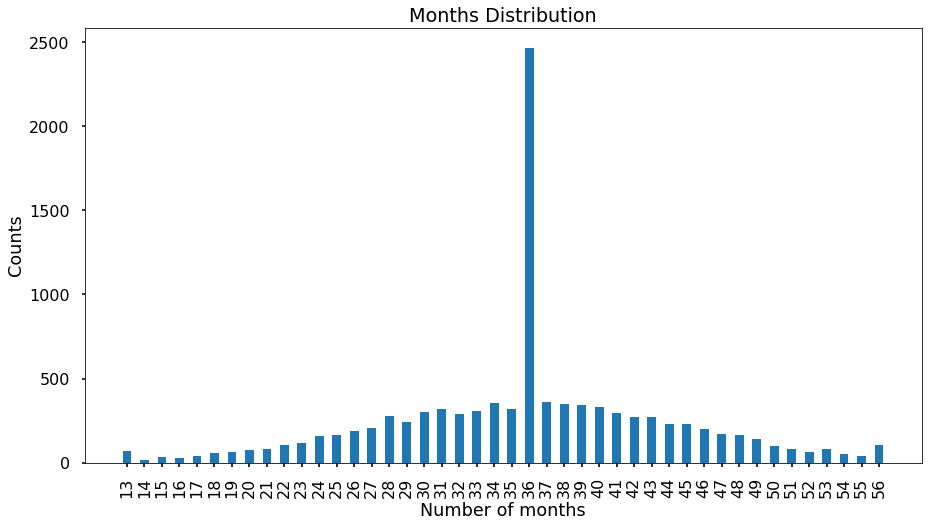

In [169]:
values, counts = np.unique(data["Months_on_book"].values, return_counts = True)

plt.figure(figsize = (15, 8))
plt.bar(range(len(values)), counts, width = 0.5 , align='center')
plt.xticks(range(len(values)), values, rotation = 90)
plt.xlabel("Number of months")
plt.ylabel('Counts')
plt.title("Months Distribution")
plt.show()

# Here we see something very strange
- It seems that most of the clients used the bank services for 36 months
- This might be something normal, might be a promotion package that lasts 3 years

# Let's check the correlation between features
- But first we need to convert categorical features to ordinal
- For that will use OrdinalEncoder from sklearn

In [186]:
encoder = OrdinalEncoder()
encoded = encoder.fit_transform(data)
encoded = pd.DataFrame(data = encoded, columns = data.columns.tolist())

# Checking for NaN or infinite values first

Check NaN or Inf values on Train:  False


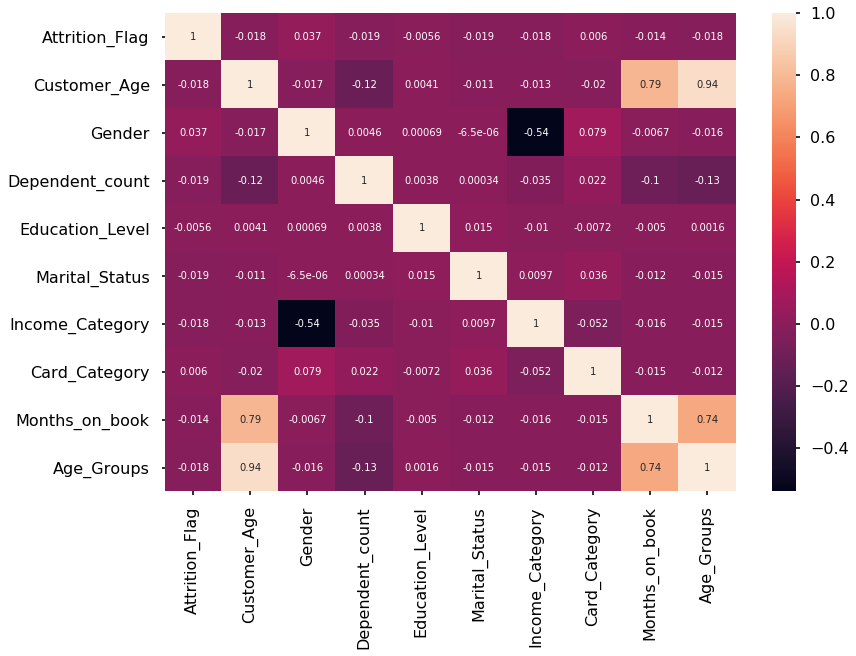

In [188]:
sanity_check = lambda x : (x.isnull().values.any() or np.isinf(x.values).any())
print("Check NaN or Inf values on Train: ", sanity_check(encoded))

sns.heatmap(encoded.corr(), annot = True)
plt.show()

# What can we observe here?
- There is a correlation between 'Income_Category' and 'Gender', nothing special here
- And a correlation between 'Months_on_book' and 'Customer_Age'
- I would have expected to see a high correlation level between 'Education_Level' and 'Income_Category' or between 'Marital Status' and 'Income_Category', but this dataset does not present those

# Let's analyze further
- Let's check some grouped statistics for correlated features

In [213]:
display(data.groupby("Income_Category")["Gender"].describe())

,count,unique,top,freq
Income_Category,,,,
$120K +,727,1,M,727
$40K - $60K,1790,2,F,1014
$60K - $80K,1402,1,M,1402
$80K - $120K,1535,1,M,1535
Less than $40K,3561,2,F,3284
Unknown,1112,2,F,1060


# Well, this is a huge bias
- It seems that in this dataset all clients that earn more then 120K are males and most of the clients that earn less then 40K are females
- And there is more, actually the first three most biggest income categories are earned totally by mens

In [214]:
display(data.groupby("Education_Level")["Income_Category"].describe())

,count,unique,top,freq
Education_Level,,,,
College,1013,6,Less than $40K,345
Doctorate,451,6,Less than $40K,158
Graduate,3128,6,Less than $40K,1139
High School,2013,6,Less than $40K,671
Post-Graduate,516,6,Less than $40K,170
Uneducated,1487,6,Less than $40K,522
Unknown,1519,6,Less than $40K,556


As we saw it before there is no correlation between the level of education and the income category

In [216]:
display(data.groupby(["Education_Level", "Gender"])["Income_Category"].describe())

count unique             top  freq
Education_Level Gender                                   
College         F        532      3  Less than $40K   319
                M        481      6    $80K - $120K   175
Doctorate       F        257      3  Less than $40K   147
                M        194      6     $60K - $80K    59
Graduate        F       1670      3  Less than $40K  1039
                M       1458      6    $80K - $120K   478
High School     F       1028      3  Less than $40K   617
                M        985      6    $80K - $120K   308
Post-Graduate   F        263      3  Less than $40K   160
                M        253      6    $80K - $120K    81
Uneducated      F        796      3  Less than $40K   485
                M        691      6    $80K - $120K   217
Unknown         F        812      3  Less than $40K   517
                M        707      6    $80K - $120K   219

It seems that no matter the "Education Level" women tend to less than 40K per year

This might not be necessary true, for better explanation we could look at the distribution of those groups.

The reason for that it's because here we only show the top category, not how are they distributed, but that's not the purpose of this project.

In [218]:
display(data.groupby(["Education_Level", "Gender"])["Marital_Status"].describe())

count unique      top freq
Education_Level Gender                           
College         F        532      4  Married  239
                M        481      4  Married  228
Doctorate       F        257      4  Married  126
                M        194      4   Single   85
Graduate        F       1670      4  Married  778
                M       1458      4  Married  701
High School     F       1028      4  Married  480
                M        985      4  Married  469
Post-Graduate   F        263      4  Married  126
                M        253      4  Married  117
Uneducated      F        796      4  Married  342
                M        691      4  Married  314
Unknown         F        812      4  Married  360
                M        707      4  Married  328

Another observation it's that only mens with higher level of education prefer to not have a relationship

Again, those observations are based on this dataset and might not represent the distribution of the real world

In [225]:
display(data.groupby("Customer_Age")["Months_on_book"].describe())

,count,mean,std,min,25%,50%,75%,max
Customer_Age,,,,,,,,
26,78.0,19.576923,8.780911,13.0,13.00,15.0,20.75,36.0
27,32.0,21.843750,8.673688,13.0,15.75,18.5,25.50,36.0
28,29.0,22.724138,9.467601,13.0,15.00,19.0,36.00,36.0
29,56.0,23.660714,8.288605,13.0,18.00,20.0,36.00,36.0
30,70.0,22.957143,7.837915,13.0,18.00,20.5,25.00,36.0
31,91.0,24.406593,6.641583,13.0,20.00,22.0,26.00,36.0
32,106.0,25.358491,7.212672,13.0,20.00,24.0,34.00,36.0
33,127.0,25.078740,6.923168,13.0,20.50,24.0,28.00,36.0
34,146.0,26.130137,5.902967,13.0,23.00,26.0,29.00,36.0


# Another observation that needs to be made, based on correlations
- It seems that if you are younger, you tend to stay as a client for maximum three years, but the elderly stay even longer

# With this observations about the dataset

# Now we can try unsupervised approaches